라이브러리 Import 하기

In [2]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

X and Y data

In [3]:
x_train = [1, 2, 3]

y_train = [2+0.1, 4-0.3, 6+0.15] # 약간의 noise 추가

# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

Initialization

In [4]:
#W = tf.Variable(tf.random_normal([1]), name='weight')
#b = tf.Variable(tf.random_normal([1]), name='bias')
w0 = 7.0;
b0 = 5.0;

W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

Our hypothesis XW+b

In [5]:
hypothesis = x_train * W + b

cost/loss function 정의하기

loss of one training example :$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [6]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

Optimizer

In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

Launch the graph in a session

In [8]:
sess = tf.Session()

Initializes global variables in the graph.

In [9]:
sess.run(tf.global_variables_initializer())

In [10]:
nb_epoch = 2001

for step in range(nb_epoch):
    sess.run(train)
    
    if step % 200 == 0: # 200번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        print(step, sess.run(loss), w1, b1)

0 191.49957 6.333 4.6996665
200 0.35716426 1.3710524 1.41991
400 0.16119462 1.6209003 0.8519472
600 0.08636397 1.7752908 0.5009811
800 0.057789873 1.870695 0.2841049
1000 0.046878874 1.9296489 0.15008868
1200 0.042712513 1.966079 0.06727501
1400 0.041121617 1.9885904 0.016101157
1600 0.040514123 2.0025008 -0.015521015
1800 0.040282175 2.011097 -0.035061836
2000 0.0401936 2.016409 -0.047137048


학습완료

In [11]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [12]:
print(w1, b1)

str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

2.016409 -0.047137048
y = 2.016409x + -0.047137048


Text(0.5, 1.0, 'y = 2.016409x + -0.047137048')

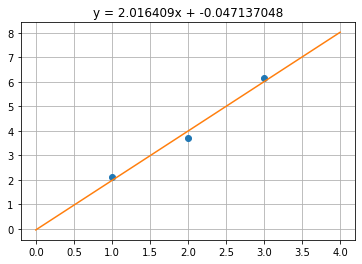

In [13]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)